In [102]:
import json
from os import listdir
from os.path import isfile, join
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [130]:
test = np.array(eigGapList)
test[test == 0] = 1.5

In [187]:
def makeJ(filename):

    with open(filename, 'r') as file:
        lines = file.readlines()
        
    num_spins = None
    couplings = []

    for line in lines:
        # Skipping comments and blanks lines
        if line.startswith("#") or line.strip() == "":
            continue
        
        parts = line.split()
        print(line)
        if len(parts) == 1:
            # read num_spins
            num_spins = int(parts[0])
            J = np.zeros((num_spins, num_spins))
        elif len(parts) == 3:  # Check coupling row
            print(f"num spins: {num_spins}")
            try:
                i, j, value = int(parts[0]), int(parts[1]), float(parts[2])
                J[i-1, j-1] = value 
                J[j-1, i-1] = value
            except ValueError:
                continue

    if num_spins is None:
        print("Could not find matrix size")

    return J

In [188]:
makeJ("C:/Users/cicer/Documents/ThesisWork/Ocean/Couplings/Couplings_L=5_u_2024-12-22_22'34'18.sg")

5 4

1 2 -0.78794

num spins: None


UnboundLocalError: local variable 'J' referenced before assignment

In [133]:
def findEigGap(filename):
    numStates = 2**numSpins
    minState = None
    minEnergy = 10**10
    degenerateStates = []
    
    for i in range(numStates):
        s = numToState(i, numSpins)
                
        # Calculate energy of state 
        currEnergy = np.dot(s, np.dot(J,s))

        # Switch if necessary, raise degenerate ground state flag if applicable
        if(currEnergy < minEnergy):
            minEnergy = currEnergy
            # minState = s.copy()
            minState = i
            degenerateStates = []
        elif (abs(currEnergy - minEnergy) < 1e-10 ):
            degenerateStates.append(i)

    return minEnergy, minState, degenerateStates
    
    return 1.5

In [145]:
jsonPath = "C:/Users/cicer/Documents/ThesisWork/Ocean/Classical_JSONs/"
couplPath = "C:/Users/cicer/Documents/ThesisWork/Ocean/Couplings/"
jsonList = listdir(jsonPath)

gndStateAccurList = []
eigGapList = []

# Converting json filename to coupling filename
file = []
for i in jsonList:
    filename = couplPath+i[0:-5] +".sg"

for i in jsonList:
    filePath = jsonPath + i
    with open(filePath,'r') as fileObj:
        sampleJson = json.load(fileObj)
        # print(sampleJson)

        nrg = np.array(sampleJson["vectors"]["energy"]["data"])
        occur = np.array(sampleJson["vectors"]["num_occurrences"]["data"])

        nrg_occur = defaultdict(int)
        for e, o in zip(nrg, occur):
            nrg_occur[e] += o
        
        energies = np.array(list(nrg_occur.keys()))
        occurrences = np.array(list(nrg_occur.values()))
        if(len(energies)==1):
            eigGap = findEigGap(couplPath + i)
        else:
            eigGap = energies[1]-energies[0]
        
        eigGapList.append(eigGap)
        # print(energies)
        # print(occurrences)

        accur = occurrences[0]/np.sum(occurrences)
        gndStateAccurList.append(accur)
        # print(f"{i} ||EigGap: {eigGap:0.2f} || Accur: {accur}")
        # print(gndStateAccurList)
        # print(f"The accuracy of {i} was: {accur}")
        # print(f"{accur}", end = ", ")
# print()

gndStateAccur = np.average(gndStateAccurList)
gndStateAccurSTDEV = np.std(gndStateAccurList)
print(f"The ground state is sampled with an accuracy of: {gndStateAccur:0.1f} +/- {gndStateAccurSTDEV:0.1f}")

The ground state is sampled with an accuracy of: 0.8 +/- 0.2


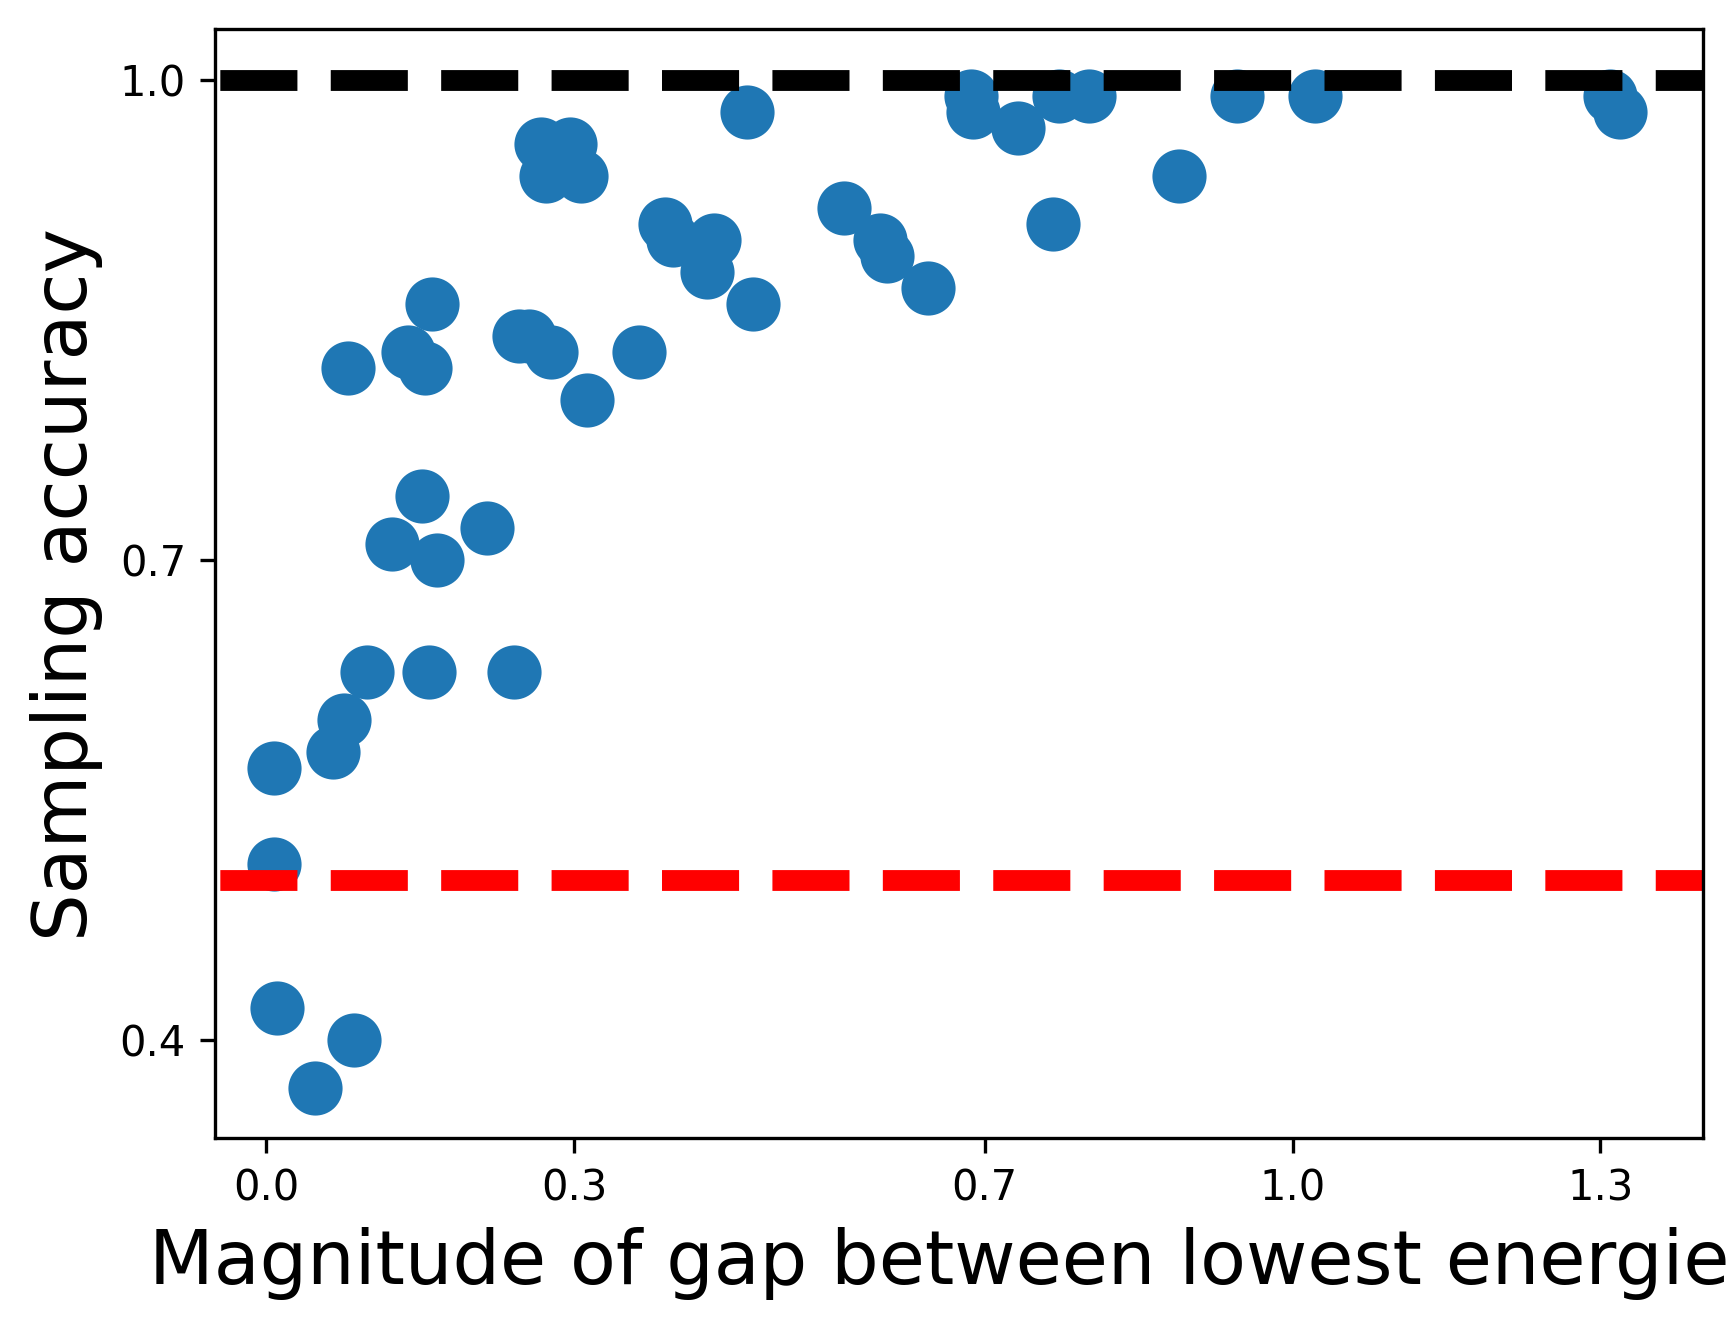

In [179]:
fig,ax = plt.subplots(dpi = 300)
plt.plot([-1,2], [1,1], c="black", linestyle='--', lw = 5)
plt.plot([-1,2], [0.5,0.5], c="red", linestyle='--', lw = 5)
plt.scatter(test, gndStateAccurList, lw = 7)
plt.xlabel("Magnitude of gap between lowest energies", size = 18)
plt.xlim([-0.05, 1.4])
plt.yticks([0.4, 0.7, 1.0])
plt.xticks([0, 0.3, 0.7, 1.0, 1.3])
plt.ylabel("Sampling accuracy", size = 18)
plt.show()

In [45]:
print(sampleJson.keys())

dict_keys(['type', 'version', 'num_variables', 'num_rows', 'sample_data', 'sample_type', 'sample_packed', 'vectors', 'variable_labels', 'variable_type', 'info'])


In [60]:
nrg = np.array(sampleJson["vectors"]["energy"]["data"])
print(nrg)
occurs = np.array(sampleJson["vectors"]["num_occurrences"]["data"])
print(occurs)

[-1.28963027 -1.28963027 -1.12358783 -1.12358783 -1.07738174 -1.07738174
 -0.9113393  -0.9113393 ]
[29 41  2  5 11  8  1  3]


In [64]:
nrg_occur = defaultdict(int)
for e, o in zip(nrg, occurs):
    nrg_occur[e] += o

energies = np.array(list(nrg_occur.keys()))
occurrences = np.array(list(nrg_occur.values()))
print(energies)
print(occurrences)

[-1.28963027 -1.12358783 -1.07738174 -0.9113393 ]
[70  7 19  4]
